### NOTEBOOK CONTENTS


    -A map of yearly CO2 flux (g/m2/yr) for the BR, LA, and PI runs
    -A comparison plot of yearly CO2 flux by region
    -A histogram of yearly CO2 flux (proportion of domain)

((nts: colourscheme: BR red, LA dimgrey, PI cornflowerblue))

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

#import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
#from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools

from math import log10, floor


In [4]:
def make_nclist(start,end, tdir, verbose):
    
    rootdir = '/data/tjarniko/results/BASERUN_EXP/MAIN/'
    nc_array = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    
    
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ymd = tdate.format('YYYYMMDD')
        if verbose == True:
            print(ymd)

        ##SKOG_1d_20151127_20151231_ptrc_T_20151231-20151231.nc    
        t_nc = rootdir + tdir + '/ncs/' \
        '/SKOG_1d_*' + '_carp_T_' +str(ymd) + '-' + str(ymd) + '.nc'
        t_ncname = glob.glob(t_nc)
        if verbose == True:
            print('file is: ' + t_ncname[0])
            print('')
        nc_array.append(t_ncname[0])
        
    return nc_array


#### cell for making nclist and extracting co2 values for the year for each run 
#### I pickled these results, the code to get the pickles is below

In [5]:
# start = '2015-01-01'
# end = '2015-12-31'

# BR = 'BR_2nd_2015/'
# PI_AC = 'PI_3rd_2015'
# PI_ACBC = 'PI_ACBC_2015_3/'

# nc_BR = make_nclist(start,end,BR,False)
# nc_PI_AC = make_nclist(start,end,PI_AC,False)
# nc_PI_ACBC = make_nclist(start,end,PI_ACBC,False)

# BR_flx = np.zeros([365,898,398])
# PI_flx = np.zeros([365,898,398])
# PI_ACBC_flx = np.zeros([365,898,398])

# for i in range(0,365):
#     if i%25 ==0:
#         print(i)
#     BR = nc.Dataset(nc_BR[i])
#     BR_flx[i,:,:] = BR['co2_flux_mmol_m2_s'][0,:,:]
#     PI = nc.Dataset(nc_PI_AC[i])
#     PI_flx[i,:,:] = PI['co2_flux_mmol_m2_s'][0,:,:]
#     PI_ACBC = nc.Dataset(nc_PI_ACBC[i])
#     PI_ACBC_flx[i,:,:] = PI_ACBC['co2_flux_mmol_m2_s'][0,:,:]
    
# pickle.dump(BR_flx, open("BR_flx.pkl", 'wb'))
# pickle.dump(PI_flx, open("LA_flx.pkl", 'wb'))
# pickle.dump(PI_ACBC_flx, open("PI_flx.pkl", 'wb'))    

In [6]:
f = open('./pickles/BR_flx.pkl', 'rb')
BR_flx = pickle.load(f)   
f = open('./pickles/PI_flx.pkl', 'rb')
PI_flx = pickle.load(f) 
f = open('./pickles/LA_flx.pkl', 'rb')
LA_flx = pickle.load(f) 

Text(0.5, 0.98, 'Mask of regions')

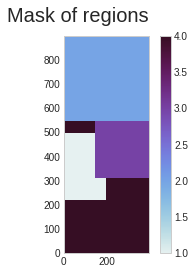

In [7]:
reg_names = ['Juan de Fuca', 'N. Strait', 'C. Strait', 'Haro Strait']
colours = ['black','orange','green', 'fuchsia']


mask = np.zeros([898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)



#### CO2 flux is in mmol/m2/s
#### for each day convert it to mmol/m2/day - then add all the days to get mmol/m2/year
#### how many seconds in a day? 

        60 s/min * 60 min/h * 24h/ day = 86400
        
#### once we have mmol/m2/year we convert to grams of C in a mmol. 
#### how many grams of C in a mmol? 12.0107 * 10e-3, by definition. 

In [8]:
BR_flx_mmol_m2_day = BR_flx * 86400
LA_flx_mmol_m2_day = LA_flx * 86400
PI_flx_mmol_m2_day = PI_flx * 86400



In [9]:
BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
PI_flx_mmol_m2_yr = np.sum(PI_flx_mmol_m2_day, axis = 0)
LA_flx_mmol_m2_yr = np.sum(LA_flx_mmol_m2_day, axis = 0)



In [10]:
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
PI_flx_gC_m2_yr = PI_flx_mmol_m2_yr*12.0107*1e-3
LA_flx_gC_m2_yr = LA_flx_mmol_m2_yr*12.0107*1e-3


BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr>1e6]=np.nan
LA_flx_gC_m2_yr[LA_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr==0]=np.nan
LA_flx_gC_m2_yr[LA_flx_gC_m2_yr==0]=np.nan

Text(0.5, 1.0, 'Domain total: CO$_2$ flux across the surface')

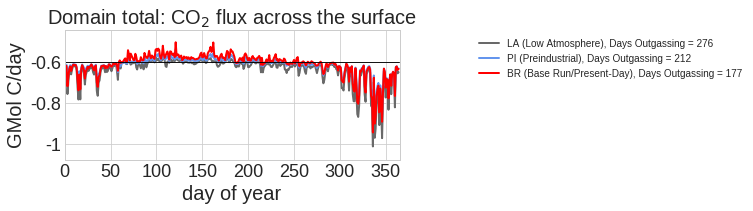

In [11]:
BR_2015_2_nc = nc.Dataset('../KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_BR_2015_2_fullyear.nc')
PI_2015_3_nc = nc.Dataset('../KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_PI_2015_3_fullyear.nc')
PI_ACBC_2015_3_nc = nc.Dataset('../KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_PI_ACBC_2015_3_fullyear.nc')
PI_ACBC_2015_2_nc = nc.Dataset('../KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_PI_ACBC_2015_2_fullyear.nc')

stor_flx_PI_15_3 = PI_2015_3_nc['model_output']['stor_flx']
stor_flx_BR_15_2 = BR_2015_2_nc['model_output']['stor_flx']
stor_flx_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_flx']
stor_flx_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_flx']
days_in = np.arange(0,np.size(stor_flx_PI_ACBC_15_2),1)

fact = 0.6
fig = plt.figure(figsize=(10*fact,4*fact))

 
ax = fig.add_subplot(1,1,1)

ax.plot(days_in,stor_flx_PI_15_3[:]/1e9,color = 'dimgrey',label = 'LA (Low Atmosphere), Days Outgassing = 276', linewidth = 2)
ax.plot(days_in,stor_flx_PI_ACBC_15_3[:]/1e9,color = 'cornflowerblue',label = 'PI (Preindustrial), Days Outgassing = 212', linewidth = 2)

ax.plot(days_in,stor_flx_BR_15_2[:]/1e9,color = 'red',label = 'BR (Base Run/Present-Day), Days Outgassing = 177', linewidth = 2)
ax.plot(days_in, np.zeros_like(days_in), color = 'k', linewidth = 0.9)
plt.xlim([0,365])
ax.legend(bbox_to_anchor=[2.05, 1.0, 0, 0])
xtl = np.arange(0,400,50)
ytl = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4]
ax.set_ylim([-1.2,0.4])
ax.set_yticklabels(ytl, fontsize = 18)
ax.set_xticklabels(xtl, fontsize = 18)
ax.set_ylabel('GMol C/day', fontsize = 20)
ax.set_xlabel('day of year', fontsize = 20)
plt.title('Domain total: CO$_2$ flux across the surface', fontsize = 20)

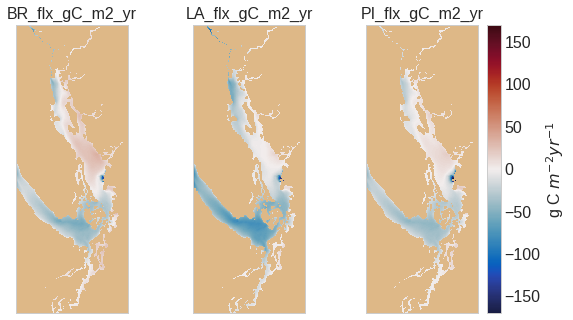

In [12]:
fact = 0.7
tf = 16


fig = plt.figure(figsize=(12*fact,6.5*fact))

ax1 = fig.add_subplot(1,3,1)
tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-170, vmax=170)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax1.set_title('BR_flx_gC_m2_yr', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax2 = fig.add_subplot(1,3,3)
tplt = PI_flx_gC_m2_yr
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-170, vmax=170)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax2.set_title('PI_flx_gC_m2_yr', fontsize = tf)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=tf)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = tf)

ax3 = fig.add_subplot(1,3,2)
tplt = LA_flx_gC_m2_yr
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-170, vmax=170)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')

ax3.set_title('LA_flx_gC_m2_yr', fontsize = tf)
plt.xticks([])
plt.yticks([])


plt.tight_layout()

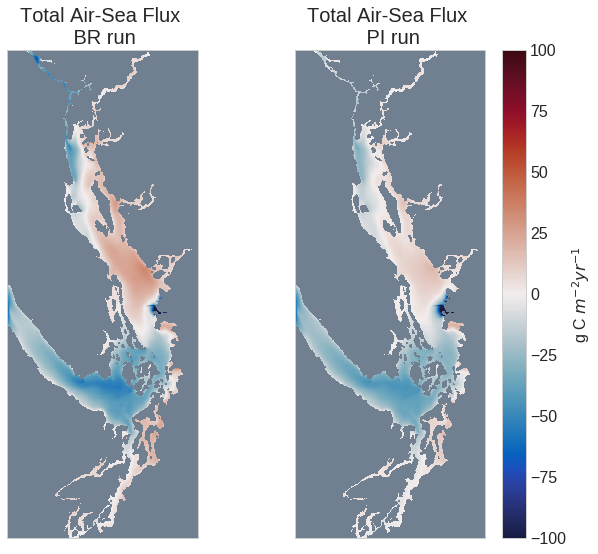

In [29]:
fact = 1.2
tf = 16
tvmin = -100
tvmax = 100

fig = plt.figure(figsize=(8*fact,6.5*fact))

ax1 = fig.add_subplot(1,2,1)
tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=tvmin, vmax=tvmax)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'slategrey')
ax1.set_title('Total Air-Sea Flux \n BR run', fontsize = tf+4)
plt.xticks([])
plt.yticks([])

ax2 = fig.add_subplot(1,2,2)
tplt = PI_flx_gC_m2_yr
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.balance, vmin=tvmin, vmax=tvmax)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'slategrey')
ax2.set_title('Total Air-Sea Flux \n PI run', fontsize = tf+4)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=tf)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = tf)




plt.tight_layout()

In [14]:
def round_sig(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)


#BR_avg = round_sig(np.mean(BR_flx_gC_m2_yr),4)

print('source (-) sink(+) g C/m2/yr stats for the three runs')
print('')
print('BR run:')
print('average:'+ str(round_sig(np.nanmean(BR_flx_gC_m2_yr),4)))
print('max:'+ str(round_sig(np.nanmax(BR_flx_gC_m2_yr),4)))
print('min:'+ str(round_sig(np.nanmin(BR_flx_gC_m2_yr),4)))
print('')
print('PI run:')
print('average:'+ str(round_sig(np.nanmean(PI_flx_gC_m2_yr),4)))
print('max:'+ str(round_sig(np.nanmax(PI_flx_gC_m2_yr),4)))
print('min:'+ str(round_sig(np.nanmin(PI_flx_gC_m2_yr),4)))
print('')
print('LA run:')
print('average:'+ str(round_sig(np.nanmean(LA_flx_gC_m2_yr),4)))
print('max:'+ str(round_sig(np.nanmax(LA_flx_gC_m2_yr),4)))
print('min:'+ str(round_sig(np.nanmin(LA_flx_gC_m2_yr),4)))

source (-) sink(+) g C/m2/yr stats for the three runs

BR run:
average:-7.134
max:35.33
min:-147.3

PI run:
average:-10.04
max:21.28
min:-186.0

LA run:
average:-23.14
max:14.81
min:-165.5


In [15]:
#5th is for the total
BR_regs = np.zeros(5)
PI_regs = np.zeros(5)
LA_regs = np.zeros(5)
for r in range(0,4):
    LA_regs[r] = np.nanmean(LA_flx_gC_m2_yr[mask == r+1])
    PI_regs[r] = np.nanmean(PI_flx_gC_m2_yr[mask == r+1])
    BR_regs[r] = np.nanmean(BR_flx_gC_m2_yr[mask == r+1])
    
BR_regs[4] = np.nanmean(BR_flx_gC_m2_yr)
PI_regs[4] = np.nanmean(PI_flx_gC_m2_yr)
LA_regs[4] = np.nanmean(LA_flx_gC_m2_yr)


Text(0.5, 1.0, 'C source(+) or sink(-) yearly mass balances')

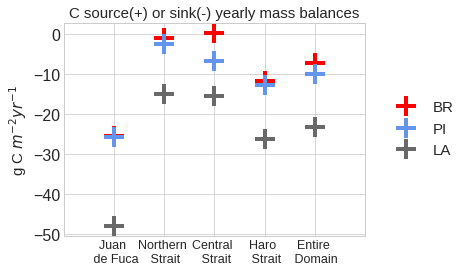

In [16]:
#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait
regs = [1,2,3,4,5]
fact = 0.6
tms = 20
tmew = 4
fig = plt.figure(figsize=(9*fact,6.5*fact))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(regs,BR_regs,'+',mew=tmew, ms=tms,color='red', markersize = 20, label = 'BR')
ax1.plot(regs,PI_regs,'+',mew=tmew, ms=tms,color='cornflowerblue', markersize = 20, label = 'PI')
ax1.plot(regs,LA_regs,'+',mew=tmew, ms=tms,linewidth = 5, \
         color='dimgrey', markersize = 20, label = 'LA')
ax1.set_xlim([0,6])
plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = 15)
ax1.tick_params(labelsize=16)
ax1.set_ylabel('g C $m^{-2}yr^{-1}$',fontsize =15)
ax1.set_xticklabels(['','Juan \n de Fuca','Northern \n Strait',\
                     'Central \n Strait','Haro \n Strait','Entire \n Domain',''], fontsize = 12.5)
ax1.set_title('C source(+) or sink(-) yearly mass balances', fontsize = 15)

## Numbers summary

In [17]:
print('JDF            NS            CS          HS           Entire_DOM')
print('LA')
print(LA_regs)
print('PI')
print(PI_regs)
print('BR')
print(BR_regs)

JDF            NS            CS          HS           Entire_DOM
LA
[-47.96546375 -14.9954514  -15.43144701 -26.26707842 -23.13523523]
PI
[-25.73915226  -2.51942381  -6.64881628 -12.82527044 -10.04275945]
BR
[-25.41162709  -0.90823486   0.2081901  -11.81735534  -7.1339671 ]


In [18]:


LA_nonan = LA_flx_gC_m2_yr[~np.isnan(LA_flx_gC_m2_yr)]
BR_nonan = BR_flx_gC_m2_yr[~np.isnan(BR_flx_gC_m2_yr)]
PI_nonan = PI_flx_gC_m2_yr[~np.isnan(PI_flx_gC_m2_yr)]



In [19]:


#make a manual histogramming code
step = 5
t_start = -100
t_end = 40
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

bin_propLA = manual_hist(LA_nonan)
t_LA = np.copy(bin_propLA)
bin_propBR = manual_hist(BR_nonan)
t_BR = np.copy(bin_propBR)
bin_propPI = manual_hist(PI_nonan)   
t_PI = np.copy(bin_propPI)


Text(0, 0.5, 'proportion of domain')

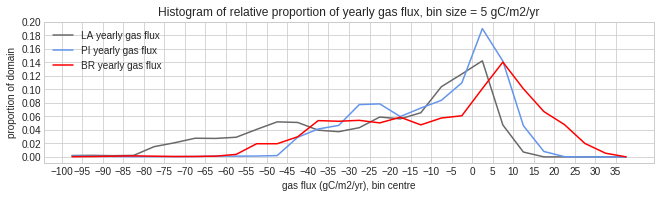

In [20]:
fact = 0.52
fig = plt.figure(figsize=(21*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)
ax1.plot(bin_centres,t_LA, color = 'dimgrey', label = 'LA yearly gas flux')
ax1.plot(bin_centres,t_PI, color = 'cornflowerblue', label = 'PI yearly gas flux')
ax1.plot(bin_centres,t_BR, color = 'red', label = 'BR yearly gas flux')




ax1.legend(loc = 'upper left')
ax1.set_title('Histogram of relative proportion of yearly gas flux, bin size = 5 gC/m2/yr')

w = ax1.set_xticks(np.arange(-100, 40, step=5))
w = ax1.set_yticks(np.arange(0, 0.22, step=0.02))
ax1.set_xlabel('gas flux (gC/m2/yr), bin centre')
ax1.set_ylabel('proportion of domain')

### Evans et al data - we need to multiply by -1 as his convention is to have CO2_into_ocean be (-), whereas for us CO2_outof_ocean is (-)
#### This pandas visualization already has the sign-switch incorporated


In [21]:
#infil = loadtxt('./pickles/Evans_seaair_numbers.csv')
import pandas as pd
data = pd.read_csv('./pickles/Evans_seaair_numbers.csv')
data = data.drop("Unnamed: 4",axis = 1)
data = data.drop("Unnamed: 5",axis = 1)
data = data.drop("Unnamed: 6",axis = 1)
data = data.drop([12,13,14,15,16,17,18,19,20], axis = 0)
data = (-1)*data
data 

,measurement_mmol_m2_s,NSTRAIT_4,CSTRAIT_5,JDF_6
0,,-999.0,-5.5,-0.4
1,,-999.0,-9.7,-0.5
2,,-999.0,9.7,-0.0
3,,-999.0,-48.5,-4.1
4,,-15.6,17.5,-2.0
5,,-5.9,-10.4,-1.1
6,,-2.5,31.8,-0.0
7,,-28.8,-37.0,-4.9
8,,-7.1,-10.0,-28.4
9,,-13.1,-6.4,-41.1


In [22]:
#extract (1)*data manually and switch sign
NS_W_mean = (1)*data['NSTRAIT_4'][0]; NS_W_std = (1)*data['NSTRAIT_4'][1] ;
NS_W_min = (1)*data['NSTRAIT_4'][2]; NS_W_max = (1)*data['NSTRAIT_4'][3] ; 
NS_S_mean = (1)*data['NSTRAIT_4'][4]; NS_S_std = (1)*data['NSTRAIT_4'][5] ;
NS_S_min = (1)*data['NSTRAIT_4'][6]; NS_S_max = (1)*data['NSTRAIT_4'][7] ;
NS_A_mean = (1)*data['NSTRAIT_4'][8]; NS_A_std = (1)*data['NSTRAIT_4'][9] ;
NS_A_min = (1)*data['NSTRAIT_4'][10]; NS_A_max = (1)*data['NSTRAIT_4'][11] ;

CS_W_mean = (1)*data['CSTRAIT_5'][0]; CS_W_std = (1)*data['CSTRAIT_5'][1] ;
CS_W_min = (1)*data['CSTRAIT_5'][2]; CS_W_max = (1)*data['CSTRAIT_5'][3] ; 
CS_S_mean = (1)*data['CSTRAIT_5'][4]; CS_S_std = (1)*data['CSTRAIT_5'][5] ;
CS_S_min = (1)*data['CSTRAIT_5'][6]; CS_S_max = (1)*data['CSTRAIT_5'][7] ;
CS_A_mean = (1)*data['CSTRAIT_5'][8]; CS_A_std = (1)*data['CSTRAIT_5'][9] ;
CS_A_min = (1)*data['CSTRAIT_5'][10]; CS_A_max = (1)*data['CSTRAIT_5'][11] ;

JDF_W_mean = (1)*data['JDF_6'][0]; JDF_W_std = (1)*data['JDF_6'][1] ;
JDF_W_min = (1)*data['JDF_6'][2]; JDF_W_max = (1)*data['JDF_6'][3] ; 
JDF_S_mean = (1)*data['JDF_6'][4]; JDF_S_std = (1)*data['JDF_6'][5] ;
JDF_S_min = (1)*data['JDF_6'][6]; JDF_S_max = (1)*data['JDF_6'][7] ;
JDF_A_mean = (1)*data['JDF_6'][8]; JDF_A_std = (1)*data['JDF_6'][9] ;
JDF_A_min = (1)*data['JDF_6'][10]; JDF_A_max = (1)*data['JDF_6'][11] ;

#### conversion gC/m2/yr to mmolC/m2/s:

from gC/m2/yr to gC/m2/s:

gC/m2/yr * (day/86400 s) (year/365 day)

from gC/m2/s to mmol/m2/s

1 mmol/ (12.0107 * 10e-3 g)

so multiply by (1/86400) * (1/365) * (1 / 12.0107 * 10e-3) 

#### conversion gC/m2/yr to mmolC/m2/day:

from gC/m2/yr to gC/m2/s:

gC/m2/yr *  (year/365 day)

from gC/m2/s to mmol/m2/s

1 mmol/ (12.0107 * 10e-3 g)

so multiply by (1/86400) * (1/365) * (1 / 12.0107 * 10e-3) 

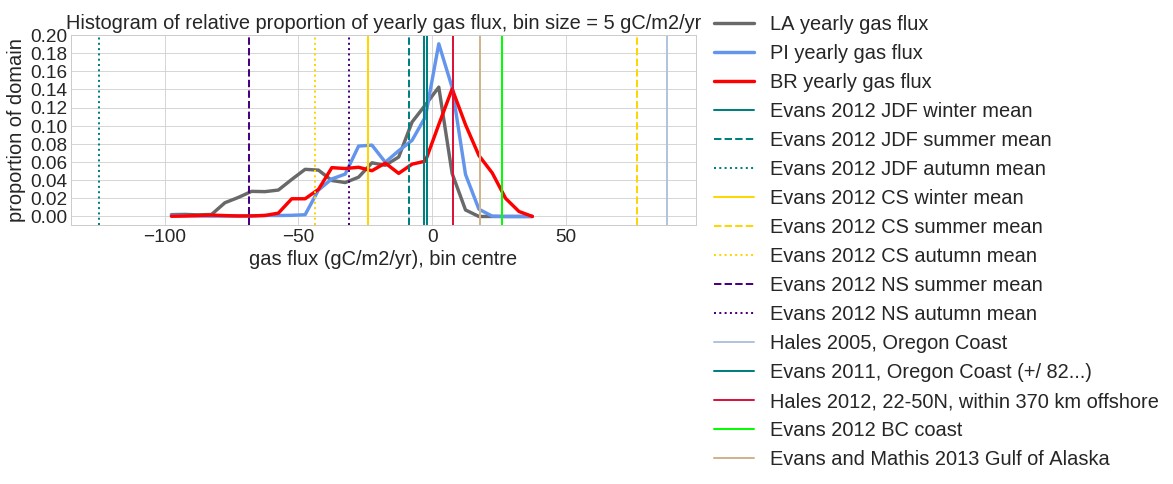

In [23]:
corfact = 1/(1 * (1/365) * (1 / 12.0107e-3))

fact = 0.7
fig = plt.figure(figsize=(16*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)
ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
ax1.plot(bin_centres,t_PI, color = 'cornflowerblue', lw = 3.4,label = 'PI yearly gas flux')
ax1.plot(bin_centres,t_BR, color = 'red', lw = 3.4,label = 'BR yearly gas flux')


ax1.axvline(JDF_W_mean*corfact, color = 'teal', lw = 2, label = 'Evans 2012 JDF winter mean')
ax1.axvline(JDF_S_mean*corfact, color = 'teal', linestyle = '--' , lw = 2, label = 'Evans 2012 JDF summer mean')
ax1.axvline(JDF_A_mean*corfact, color = 'teal', linestyle = ':', lw = 2, label = 'Evans 2012 JDF autumn mean')

ax1.axvline(CS_W_mean*corfact, color = 'gold', lw = 2, label = 'Evans 2012 CS winter mean')
ax1.axvline(CS_S_mean*corfact, color = 'gold', linestyle = '--' , lw = 2, label = 'Evans 2012 CS summer mean')
ax1.axvline(CS_A_mean*corfact, color = 'gold', linestyle = ':', lw = 2, label = 'Evans 2012 CS autumn mean')

#ax1.axvline(NS_W_mean*corfact, color = 'indigo', lw = 2, label = 'NS winter mean')
ax1.axvline(NS_S_mean*corfact, color = 'indigo', linestyle = '--' , lw = 2, label = 'Evans 2012 NS summer mean')
ax1.axvline(NS_A_mean*corfact, color = 'indigo', linestyle = ':', lw = 2, label = 'Evans 2012 NS autumn mean')

#
ax1.axvline(88, color = 'lightsteelblue', lw = 2, label = 'Hales 2005, Oregon Coast')
ax1.axvline(-3.1, color = 'teal', lw = 2, label = 'Evans 2011, Oregon Coast (+/ 82...)')
ax1.axvline(7.9, color = 'crimson', lw = 2, label = 'Hales 2012, 22-50N, within 370 km offshore')
ax1.axvline(26, color = 'lime', lw = 2, label = 'Evans 2012 BC coast')
ax1.axvline(18, color = 'tan', lw = 2, label = 'Evans and Mathis 2013 Gulf of Alaska')

ax1.legend(bbox_to_anchor=[1.00, 1.2], fontsize =20)
ax1.set_title('Histogram of relative proportion of yearly gas flux, bin size = 5 gC/m2/yr', fontsize =20)

#w = ax1.set_xticks(np.arange(-100, 40, step=5))
w = ax1.set_yticks(np.arange(0, 0.22, step=0.02))
ax1.set_xlabel('gas flux (gC/m2/yr), bin centre', fontsize =20 )
ax1.set_ylabel('proportion of domain', fontsize =20)
ax1.tick_params(axis='both', which='major', labelsize=19)
ax1.tick_params(axis='both', which='minor', labelsize=19)

In [24]:
yearmask = np.zeros([365,898,398])

for i in range(0,365):
    yearmask[i,:,:] = mask

In [25]:
print('1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait (c. strait)')

# Season definition: Winter as January 1 to March 31, spring as April 1 to
# June 30, summer as July 1 to September 30, and autumn as October
# 1 to December 31. (as used in Evans 2011). 

#jdf_haro
BR_flx_JH = np.copy(BR_flx)
BR_flx_JH[BR_flx>1e10] = np.nan
BR_flx_JH[yearmask==2] = np.nan
BR_flx_JH[yearmask==3] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
BR_flx_JH = BR_flx_JH*86400


#central_strait
BR_flx_CS = np.copy(BR_flx)
BR_flx_CS[BR_flx>1e10] = np.nan
BR_flx_CS[yearmask!=3] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
BR_flx_CS = BR_flx_CS*86400

#northern_strait
BR_flx_NS = np.copy(BR_flx)
BR_flx_NS[BR_flx>1e10] = np.nan
BR_flx_NS[yearmask!=2] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
BR_flx_NS = BR_flx_NS*86400

#
#jdf_haro
LA_flx_JH = np.copy(LA_flx)
LA_flx_JH[LA_flx>1e10] = np.nan
LA_flx_JH[yearmask==2] = np.nan
LA_flx_JH[yearmask==3] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
LA_flx_JH = LA_flx_JH*86400


#central_strait
LA_flx_CS = np.copy(LA_flx)
LA_flx_CS[LA_flx>1e10] = np.nan
LA_flx_CS[yearmask!=3] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
LA_flx_CS = LA_flx_CS*86400

#northern_strait
LA_flx_NS = np.copy(LA_flx)
LA_flx_NS[LA_flx>1e10] = np.nan
LA_flx_NS[yearmask!=2] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
LA_flx_NS = LA_flx_NS*86400

#jdf_haro
PI_flx_JH = np.copy(PI_flx)
PI_flx_JH[PI_flx>1e10] = np.nan
PI_flx_JH[yearmask==2] = np.nan
PI_flx_JH[yearmask==3] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
PI_flx_JH = PI_flx_JH*86400


#central_strait
PI_flx_CS = np.copy(PI_flx)
PI_flx_CS[PI_flx>1e10] = np.nan
PI_flx_CS[yearmask!=3] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
PI_flx_CS = PI_flx_CS*86400

#northern_strait
PI_flx_NS = np.copy(PI_flx)
PI_flx_NS[PI_flx>1e10] = np.nan
PI_flx_NS[yearmask!=2] = np.nan
#convert from mmol/m2/s to mmol/m2/day with convfactor 86400 s/day
PI_flx_NS = PI_flx_NS*86400

1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait (c. strait)


KeyboardInterrupt: 

In [ ]:
# starts and ends of things
# Season definition: Winter as January 1 to March 31, spring as April 1 to
# June 30, summer as July 1 to September 30, and autumn as October
# 1 to December 31. (as used in Evans 2011). 
# S is summer not spring
ds_S = 182-1
de_S = 273-1
ds_W = 1-1
de_W = 90-1
ds_A = 274-1
de_A = 365-1

In [ ]:
BR_JH_S = BR_flx_JH[ds_S:de_S,:,:]

In [ ]:
step = 2
t_start = -150
t_end = 40
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop





In [ ]:
#BR histograms
BR_JH_S = BR_flx_JH[ds_S:de_S,:,:]; BR_JH_S[BR_JH_S==0] = np.nan; BR_JH_S_nn = BR_JH_S[~np.isnan(BR_JH_S)];
bp_BR_JH_S = manual_hist(BR_JH_S_nn); t_bp_BR_JH_S = np.copy(bp_BR_JH_S);
BR_CS_S = BR_flx_CS[ds_S:de_S,:,:]; BR_CS_S[BR_CS_S==0] = np.nan; BR_CS_S_nn = BR_CS_S[~np.isnan(BR_CS_S)];
bp_BR_CS_S = manual_hist(BR_CS_S_nn); t_bp_BR_CS_S = np.copy(bp_BR_CS_S);
BR_NS_S = BR_flx_NS[ds_S:de_S,:,:]; BR_NS_S[BR_NS_S==0] = np.nan; BR_NS_S_nn = BR_NS_S[~np.isnan(BR_NS_S)];
bp_BR_NS_S = manual_hist(BR_NS_S_nn); t_bp_BR_NS_S = np.copy(bp_BR_NS_S)
#LA histograms
LA_JH_S = LA_flx_JH[ds_S:de_S,:,:]; LA_JH_S[LA_JH_S==0] = np.nan; LA_JH_S_nn = LA_JH_S[~np.isnan(LA_JH_S)];
bp_LA_JH_S = manual_hist(LA_JH_S_nn); t_bp_LA_JH_S = np.copy(bp_LA_JH_S);
LA_CS_S = LA_flx_CS[ds_S:de_S,:,:]; LA_CS_S[LA_CS_S==0] = np.nan; LA_CS_S_nn = LA_CS_S[~np.isnan(LA_CS_S)];
bp_LA_CS_S = manual_hist(LA_CS_S_nn); t_bp_LA_CS_S = np.copy(bp_LA_CS_S);
LA_NS_S = LA_flx_NS[ds_S:de_S,:,:]; LA_NS_S[LA_NS_S==0] = np.nan; LA_NS_S_nn = LA_NS_S[~np.isnan(LA_NS_S)];
bp_LA_NS_S = manual_hist(LA_NS_S_nn); t_bp_LA_NS_S = np.copy(bp_LA_NS_S)
#PI histograms
PI_JH_S = PI_flx_JH[ds_S:de_S,:,:]; PI_JH_S[PI_JH_S==0] = np.nan; PI_JH_S_nn = PI_JH_S[~np.isnan(PI_JH_S)];
bp_PI_JH_S = manual_hist(PI_JH_S_nn); t_bp_PI_JH_S = np.copy(bp_PI_JH_S);
PI_CS_S = PI_flx_CS[ds_S:de_S,:,:]; PI_CS_S[PI_CS_S==0] = np.nan; PI_CS_S_nn = PI_CS_S[~np.isnan(PI_CS_S)];
bp_PI_CS_S = manual_hist(PI_CS_S_nn); t_bp_PI_CS_S = np.copy(bp_PI_CS_S);
PI_NS_S = PI_flx_NS[ds_S:de_S,:,:]; PI_NS_S[PI_NS_S==0] = np.nan; PI_NS_S_nn = PI_NS_S[~np.isnan(PI_NS_S)];
bp_PI_NS_S = manual_hist(PI_NS_S_nn); t_bp_PI_NS_S = np.copy(bp_PI_NS_S)
##
#BR histograms
BR_JH_A = BR_flx_JH[ds_A:de_A,:,:]; BR_JH_A[BR_JH_A==0] = np.nan; BR_JH_A_nn = BR_JH_A[~np.isnan(BR_JH_A)];
bp_BR_JH_A = manual_hist(BR_JH_A_nn); t_bp_BR_JH_A = np.copy(bp_BR_JH_A);
BR_CS_A = BR_flx_CS[ds_A:de_A,:,:]; BR_CS_A[BR_CS_A==0] = np.nan; BR_CS_A_nn = BR_CS_A[~np.isnan(BR_CS_A)];
bp_BR_CS_A = manual_hist(BR_CS_A_nn); t_bp_BR_CS_A = np.copy(bp_BR_CS_A);
BR_NS_A = BR_flx_NS[ds_A:de_A,:,:]; BR_NS_A[BR_NS_A==0] = np.nan; BR_NS_A_nn = BR_NS_A[~np.isnan(BR_NS_A)];
bp_BR_NS_A = manual_hist(BR_NS_A_nn); t_bp_BR_NS_A = np.copy(bp_BR_NS_A)
#LA histograms
LA_JH_A = LA_flx_JH[ds_A:de_A,:,:]; LA_JH_A[LA_JH_A==0] = np.nan; LA_JH_A_nn = LA_JH_A[~np.isnan(LA_JH_A)];
bp_LA_JH_A = manual_hist(LA_JH_A_nn); t_bp_LA_JH_A = np.copy(bp_LA_JH_A);
LA_CS_A = LA_flx_CS[ds_A:de_A,:,:]; LA_CS_A[LA_CS_A==0] = np.nan; LA_CS_A_nn = LA_CS_A[~np.isnan(LA_CS_A)];
bp_LA_CS_A = manual_hist(LA_CS_A_nn); t_bp_LA_CS_A = np.copy(bp_LA_CS_A);
LA_NS_A = LA_flx_NS[ds_A:de_A,:,:]; LA_NS_A[LA_NS_A==0] = np.nan; LA_NS_A_nn = LA_NS_A[~np.isnan(LA_NS_A)];
bp_LA_NS_A = manual_hist(LA_NS_A_nn); t_bp_LA_NS_A = np.copy(bp_LA_NS_A)
#PI histograms
PI_JH_A = PI_flx_JH[ds_A:de_A,:,:]; PI_JH_A[PI_JH_A==0] = np.nan; PI_JH_A_nn = PI_JH_A[~np.isnan(PI_JH_A)];
bp_PI_JH_A = manual_hist(PI_JH_A_nn); t_bp_PI_JH_A = np.copy(bp_PI_JH_A);
PI_CS_A = PI_flx_CS[ds_A:de_A,:,:]; PI_CS_A[PI_CS_A==0] = np.nan; PI_CS_A_nn = PI_CS_A[~np.isnan(PI_CS_A)];
bp_PI_CS_A = manual_hist(PI_CS_A_nn); t_bp_PI_CS_A = np.copy(bp_PI_CS_A);
PI_NS_A = PI_flx_NS[ds_A:de_A,:,:]; PI_NS_A[PI_NS_A==0] = np.nan; PI_NS_A_nn = PI_NS_A[~np.isnan(PI_NS_A)];
bp_PI_NS_A = manual_hist(PI_NS_A_nn); t_bp_PI_NS_A = np.copy(bp_PI_NS_A)
##
#BR histograms
BR_JH_W = BR_flx_JH[ds_W:de_W,:,:]; BR_JH_W[BR_JH_W==0] = np.nan; BR_JH_W_nn = BR_JH_W[~np.isnan(BR_JH_W)];
bp_BR_JH_W = manual_hist(BR_JH_W_nn); t_bp_BR_JH_W = np.copy(bp_BR_JH_W);
BR_CS_W = BR_flx_CS[ds_W:de_W,:,:]; BR_CS_W[BR_CS_W==0] = np.nan; BR_CS_W_nn = BR_CS_W[~np.isnan(BR_CS_W)];
bp_BR_CS_W = manual_hist(BR_CS_W_nn); t_bp_BR_CS_W = np.copy(bp_BR_CS_W);
BR_NS_W = BR_flx_NS[ds_W:de_W,:,:]; BR_NS_W[BR_NS_W==0] = np.nan; BR_NS_W_nn = BR_NS_W[~np.isnan(BR_NS_W)];
bp_BR_NS_W = manual_hist(BR_NS_W_nn); t_bp_BR_NS_W = np.copy(bp_BR_NS_W)
#LA histograms
LA_JH_W = LA_flx_JH[ds_W:de_W,:,:]; LA_JH_W[LA_JH_W==0] = np.nan; LA_JH_W_nn = LA_JH_W[~np.isnan(LA_JH_W)];
bp_LA_JH_W = manual_hist(LA_JH_W_nn); t_bp_LA_JH_W = np.copy(bp_LA_JH_W);
LA_CS_W = LA_flx_CS[ds_W:de_W,:,:]; LA_CS_W[LA_CS_W==0] = np.nan; LA_CS_W_nn = LA_CS_W[~np.isnan(LA_CS_W)];
bp_LA_CS_W = manual_hist(LA_CS_W_nn); t_bp_LA_CS_W = np.copy(bp_LA_CS_W);
LA_NS_W = LA_flx_NS[ds_W:de_W,:,:]; LA_NS_W[LA_NS_W==0] = np.nan; LA_NS_W_nn = LA_NS_W[~np.isnan(LA_NS_W)];
bp_LA_NS_W = manual_hist(LA_NS_W_nn); t_bp_LA_NS_W = np.copy(bp_LA_NS_W)
#PI histograms
PI_JH_W = PI_flx_JH[ds_W:de_W,:,:]; PI_JH_W[PI_JH_W==0] = np.nan; PI_JH_W_nn = PI_JH_W[~np.isnan(PI_JH_W)];
bp_PI_JH_W = manual_hist(PI_JH_W_nn); t_bp_PI_JH_W = np.copy(bp_PI_JH_W);
PI_CS_W = PI_flx_CS[ds_W:de_W,:,:]; PI_CS_W[PI_CS_W==0] = np.nan; PI_CS_W_nn = PI_CS_W[~np.isnan(PI_CS_W)];
bp_PI_CS_W = manual_hist(PI_CS_W_nn); t_bp_PI_CS_W = np.copy(bp_PI_CS_W);
PI_NS_W = PI_flx_NS[ds_W:de_W,:,:]; PI_NS_W[PI_NS_W==0] = np.nan; PI_NS_W_nn = PI_NS_W[~np.isnan(PI_NS_W)];
bp_PI_NS_W = manual_hist(PI_NS_W_nn); t_bp_PI_NS_W = np.copy(bp_PI_NS_W)

## A schematic of seasonal statistics of air-sea flux (Evans et al 2012)
#### negative values are out-of-ocean here
#### x axis has not been adjusted, to allow natural range to be expressed

In [ ]:


#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 0.6
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()

## Wiley Air-sea 

In [ ]:



#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 0.6
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_S, color = 'red')
ax1.set_xlim([-150,50])

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_A, color = 'red')
ax1.set_xlim([-150,50])

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_W, color = 'red')
ax1.set_xlim([-150,50])

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_S, color = 'red')
ax1.set_xlim([-150,50])

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_A, color = 'red')
ax1.set_xlim([-150,50])
#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)


#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_W, color = 'red')
ax1.set_xlim([-150,50])
#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_S, color = 'red')
ax1.set_xlim([-150,50])
#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_A, color = 'red')
ax1.set_xlim([-150,50])
#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_W, color = 'red')
ax1.set_xlim([-150,50])

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()

## range adjusted to -10:10, 0:0.8 adjusted 

In [ ]:



#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 0.6
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_S, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_A, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_W, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_S, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_A, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)


#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_W, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_S, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_A, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_W, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.8]);

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()


#pickle.dump((fig, ax1, proj1), open('surface-land-map.pickle','wb'))

In [ ]:



#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 1
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_S, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_A, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_W, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_S, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_A, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)


#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_W, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_S, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_A, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_W, color = 'red')
ax1.set_xlim([-20,20]);ax1.set_ylim([0,0.5]);

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()

####

pickle.dump((fig, ax1), open('raf.pickle','wb'))




In [ ]:
# fig, ax1 = pickle.load(open('raf.pickle','wb'))

In [ ]:
# figx = pickle.load(  open('regional_airseaflux.pkl',  'rb')  )

# # display the loaded figure:
# #import matplotlib.pyploy as plt       # think this is necessary...haven't tested
# figx.show()   # show the figure, edit it etc.!
# #data = figx.axes[0].lines[0].get_data()  

In [ ]:



#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 0.6
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_S, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_A, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_W, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_S, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_A, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)


#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_W, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_S, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_A, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);
#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_W, color = 'red')
ax1.set_xlim([-10,10]);ax1.set_ylim([0,0.5]);

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()

In [ ]:



#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 0.6
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_S, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_A, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_W, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_S, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_A, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)


#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_W, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_S, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_A, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_W, color = 'red')
ax1.set_xlim([-5,5]);ax1.set_ylim([0,0.8]);

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()

In [ ]:



#convert mmol/m2/s to mmol/m2/day

#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait

fact = 0.6
tms = 20
tmew = 4
tsz = 14
trot = 80
tcol = 'dimgrey'
tcol2 = 'lightsteelblue'
fig = plt.figure(figsize=(12*fact,12*fact))

ax1 = fig.add_subplot(3,3,1)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_S, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_S_mean-JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_S_mean+JDF_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_S_mean-JDF_S_std, JDF_S_mean+JDF_S_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_S_min, JDF_S_max, alpha=0.2, color=tcol2)

plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,2)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_A, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_A_mean-JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_A_mean+JDF_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_A_mean-JDF_A_std, JDF_A_mean+JDF_A_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_A_min, JDF_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,3)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('JDF: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_JH_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_JH_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_JH_W, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(JDF_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(JDF_W_mean-JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(JDF_W_mean+JDF_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(JDF_W_mean-JDF_W_std, JDF_W_mean+JDF_W_std, alpha=0.5, color=tcol2)
ax1.axvline(JDF_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(JDF_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(JDF_W_min, JDF_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,4)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_S, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);

#lines
ax1.axvline(CS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_S_mean-CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_S_mean+CS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_S_mean-CS_S_std, CS_S_mean+CS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_S_min, CS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,5)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_A, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(CS_A_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_A_mean-CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_A_mean+CS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_A_mean-CS_A_std, CS_A_mean+CS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_A_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_A_min, CS_A_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,6)


#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('CS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_CS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_CS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_CS_W, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(CS_W_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(CS_W_mean-CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(CS_W_mean+CS_W_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(CS_W_mean-CS_W_std, CS_W_mean+CS_W_std, alpha=0.5, color=tcol2)
ax1.axvline(CS_W_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(CS_W_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(CS_W_min, CS_W_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

###CS
ax1 = fig.add_subplot(3,3,7)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Summer', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_S, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_S, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_S, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(NS_S_mean, color = tcol, linestyle = '-' , lw = 2)
ax1.axvline(NS_S_mean-NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvline(NS_S_mean+NS_S_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_S_mean-NS_S_std, NS_S_mean+NS_S_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_S_max, color = tcol, linestyle = ':' , lw = 2)
ax1.axvline(NS_S_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_S_min, NS_S_max, alpha=0.2, color=tcol2)
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,8)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Autumn', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_A, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_A, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_A, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);
#lines
ax1.axvline(NS_A_mean, color = tcol, linestyle = '-' , lw = 2, label = 'mean')
ax1.axvline(NS_A_mean-NS_A_std, color = tcol, linestyle = '--' , lw = 2, label = 'mean ± std. dev')
ax1.axvline(NS_A_mean+NS_A_std, color = tcol, linestyle = '--' , lw = 2)
ax1.axvspan(NS_A_mean-NS_A_std, NS_A_mean+NS_A_std, alpha=0.5, color=tcol2)
ax1.axvline(NS_A_max, color = tcol, linestyle = ':', label = 'max/min', lw = 2)
ax1.axvline(NS_A_min, color = tcol, linestyle = ':' , lw = 2)
ax1.axvspan(NS_A_min, NS_A_max, alpha=0.2, color=tcol2)
plt.legend(bbox_to_anchor=[3.5,3.15])
plt.xticks(rotation=trot)

ax1 = fig.add_subplot(3,3,9)

#plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = tsz)
ax1.tick_params(labelsize=tsz)
ax1.set_xlabel('mmol C $m^{-2}day^{-1}$',fontsize =tsz)
ax1.set_title('NS: Winter', fontsize = tsz)

ax1.plot(bin_centres,t_bp_LA_NS_W, color = 'dimgrey')
ax1.plot(bin_centres,t_bp_PI_NS_W, color = 'cornflowerblue')
ax1.plot(bin_centres,t_bp_BR_NS_W, color = 'red')
ax1.set_xlim([-1,1]);ax1.set_ylim([0,0.8]);

#lines
#no lines (no data)
plt.xticks(rotation=trot)

plt.tight_layout()

### Why is there both 0 (shown as -0) and 1e20 in these? This confused me because all the 0's skewed the histogram before I masked them out. Let's visualise where they are...

In [ ]:

BR_flx_t_d0 = BR_flx[0,:,:]*86400 
#print(BR_flx_t_d0[400,:])
BR_flx_t_d0_m = np.copy(BR_flx_t_d0)

BR_flx_t_d0_m[BR_flx_t_d0>1e10] = 10 
BR_flx_t_d0_m[BR_flx_t_d0==0] = 5 

fig, ax = plt.subplots(1, 1, figsize=(3, 5))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(BR_flx_t_d0, cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.title('BR_flx day 0, mmol/m2/day',fontsize=12)
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(3, 5))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(BR_flx_t_d0_m, cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.title('BR_flx day 0, mmol/m2/day\n  0 in original = 5, >1e10 in original = 10',fontsize=12)
plt.tight_layout()